# Advertising Sales Regression Analysis

In this project, I analyze advertising sales data with four different linear regression models. Each model aims to predict the "sales" feature, a measure of product sales within a given market in thousands of dollars. The first three univariate linear regressions take a look at advertising dollars spent on TV, radio, and newspaper ads. The final model includes all three features (TV, radio, and newspaper ad sales) in a multivariate linear regression model.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# First Look at the Dataset

The loaded dataset is printed below detailing the amount of money spent on advertising in TV, radio, and newspaper. There is also a column that lists the product sales (in thousands). The dataset is primarily made up of floats and do not have any categorical values. 

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Regression #1: Sales and TV

The regression performed below investigates the relationship between advertising dollars spent on TV and sales of a product. I've fit a linear model to the x input being the amount of money spent on TV advertising and the y output as the amount of sales generated by the product. As you can see in the plot below there is a positive correlation between the volume of advertising money spent on TV and the overall sales acheived by the product (R-squared = 0.6). 

Taking a look at the statistical outputs, intercept and slope, we can see that when there are zero dollars spent on TV advertising (x = 0) the product sales are about $7,000 because the intercept = 7. The slope of the line provides an idea of how impactful increasing the amount of money spent on TV advertising affects the overall sales of the product. With a slope of 0.05, based on the model, we can expect to see that as you increase the TV advertising money by 1, the overall sales of the product will increase by 0.05.

I've also printed the regression summary statistics from the statsmodel package. With a p value of 0.00, we can conclude that TV advertising cost has a statistically significant positive impact on the sales of the product.

Slope: [[0.04753664]]
Intercept: [7.03259355]
Root mean squared error:  10.512652915656757
R2 score:  0.611875050850071


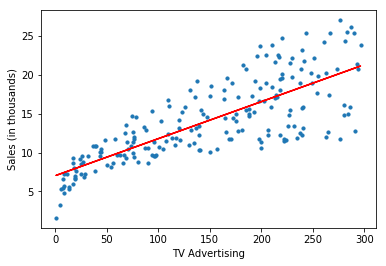

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# TV Advertising Cost and Product Sales Regression Analysis

# set x and y inputs
x = ad_data[['TV']]
y = ad_data[['sales']]

# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
# data points
plt.scatter(x, y, s=10)
plt.xlabel('TV Advertising')
plt.ylabel('Sales (in thousands)')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [4]:
# Generate statisical summary of the regression model results for tv ads
# import statsmodel package
import statsmodels.formula.api as sm

# define model and fit
ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data)
results = ols_model.fit()

# print out statisical summary of regression model results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        12:17:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression #2: Radio and Sales

Now I'll take a look at how money spent on radio advertising correlates with the sales of a product. Below I've fit a similar linear model as the one above, this time with radio advertising money. We can immediately that the correlation is weaker than we saw with TV advertising (R-squared = 0.33). 

Again, we can see from the intercept that when radio advertising money is zero, the sales are about $9,300 (intercept = 9.3). The slope is 0.2 so we can see that the impact of raising the amount of money in radio advertising by 1, will increase the sales by 0.2, which is a bit larger than we saw with the TV advertising relationship. Again, we see the p-value of 0.00 suggesting that the positive relationship between the money put into radio advertising and the overall sales of the product is statistically signficant.

Slope: [[0.20249578]]
Intercept: [9.3116381]
Root mean squared error:  18.09239774512544
R2 score:  0.33203245544529525


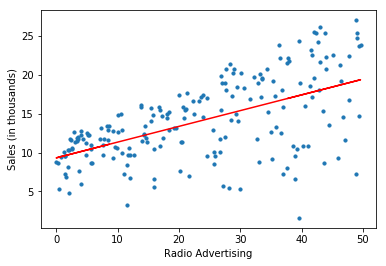

In [5]:
# Radio Advertising Cost and Product Sales Regression Analysis
# definte x and y inputs for regression model
x = ad_data[['radio']]
y = ad_data[['sales']]

# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
# data points
plt.scatter(x, y, s=10)
plt.xlabel('Radio Advertising')
plt.ylabel('Sales (in thousands)')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [6]:
# Generate statisical summary of regression model results for radio ads
# import statsmodels
import statsmodels.formula.api as sm

# define and fit model
ols_model = sm.ols(formula = 'sales ~ radio', data=ad_data)
results = ols_model.fit()

# print out summary statistics of regression results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           4.35e-19
Time:                        12:17:05   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression #3: Newspaper and Sales

Taking the same steps as above for TV and radio advertising costs, I fit a regression model to look at the relationship between newspaper advertising costs and the overall sales of a product. We can see that newspaper advertising costs has the weakest correlation with sales (0.052). The intercept of 12.4 suggests that the when newspaper advertising costs are at zero, the sales of the product are around $12,400. The slope is low at 0.05 suggesting that increasing the newspaper advertising costs by 1 will increase the overall sales by 0.05. 

It's interesting to see that the slope of the TV advertising cost and sales regression is the same as that of the radio advertising cost regression. However, the correlation was stronger in the TV advertising cost and sales model (R-squared = 0.66) compared to that of the radio advertising model (R-sqared = 0.05) I'm also surprised to see that the p value for the newspaper advertising cost and product sales relationship is statistically significant (p = 0.001). It's possible that we just need more data to strengthen this claim.

Slope: [[0.0546931]]
Intercept: [12.35140707]
Root mean squared error:  25.674022720559698
R2 score:  0.05212044544430516


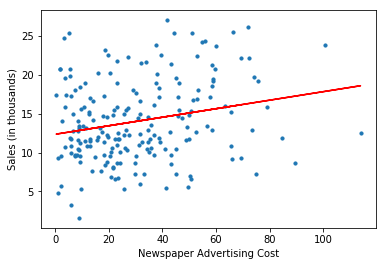

In [7]:
# Newspaper Advertising Cost and Product Sales Regression Analysis
x = ad_data[['newspaper']]
y = ad_data[['sales']]

# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
# data points
plt.scatter(x, y, s=10)
plt.xlabel('Newspaper Advertising Cost')
plt.ylabel('Sales (in thousands)')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [8]:
# Generate statisical summary of regression model results for newspaper ads
import statsmodels.formula.api as sm

# define and fit model
ols_model = sm.ols(formula = 'sales ~ newspaper', data=ad_data)
results = ols_model.fit()

# print summary statistics of regression model results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 18 Aug 2019   Prob (F-statistic):            0.00115
Time:                        12:17:05   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Linear Regression

After examining each feature independently, I plugged them all into the model to determine how the three types of advertising costs influence product sales. Following the sames steps as above, I created a regression model with the three types of advertising costs as inputs to examine the effect on product sales. I also used generated the statistical summary using the statsmodel package. The correlation between all three types of advertising and the product sales are highly correlated (R-squared = 0.9). The coefficients provide the influence of each feature in the context of product sales. From these values, it's clear that radio advertising cost has the largest influence, similar to as we saw above.

The p values of TV and radio advertising costs are 0.00. However, the p value of the newspaper advertising cost is not statisically signficant at 0.86. This reinforces the weak correlation observed above, however, it's still surprising to me to see such a p value when looking only at the newspaper advertising cost and product sales model.

In [9]:
# define x and y inputs for multivariate regression model
x = ad_data[['TV', 'radio', 'newspaper']]
y = ad_data[['sales']]

In [10]:
# with sklearn
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

# print intercept and coefficient values
print('Intercept: \n', regression_model.intercept_) # pull out intercept
print('Coefficients: \n', regression_model.coef_) # pull out coeffeicients

Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


In [11]:
# Generate statisical summary of multivariate regression model results
import statsmodels.formula.api as sm

# define model and fit
ols_model = sm.ols(formula = 'y ~ x', data=ad_data)
results = ols_model.fit()

# print summary statistics for multivariate regression model results
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        12:17:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
x[0]           0.0458      0.001     32.809      0.000       0.043       0.049
x[1]           0.1885      0.009     21.893      0.000       0.172       0.206
x[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

Based on the regression models generated above, it seems like the money spent on TV advertising had the largest correlation with sales (0.6) but the cost of radio advertising had the largest impact on product sales incrementally (slope = 0.2). 

Looking at all three advertising costs together, there is a strong correlation with sales. However, based on these regression analyses, I'd consider investing less in newspaper advertising and more in TV or radio advertising as these seem to correlate with / impact the product sales more than the money spent on newspaper advertising. 